package imports

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import seaborn as sns
from scipy.optimize import minimize
from lppls import lppls


get financial data

In [2]:
ticker = 'BTC-USD'
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2021, 1, 25)

data = pdr.get_data_yahoo(ticker, start=start, end=end)
data

tLen = len(data)
time = np.linspace(0, tLen-1, tLen)
close = [data["Close"][i] for i in range(len(data["Close"]))]
DataSeries = np.array([time, close])
print(tLen)

max_searches = 25

753


In [3]:
lppls_model = lppls.LPPLS(DataSeries)
tc, m, w, a, b, c, c1, c2 = lppls_model.fit(DataSeries, max_searches, minimizer = 'Nelder-Mead')

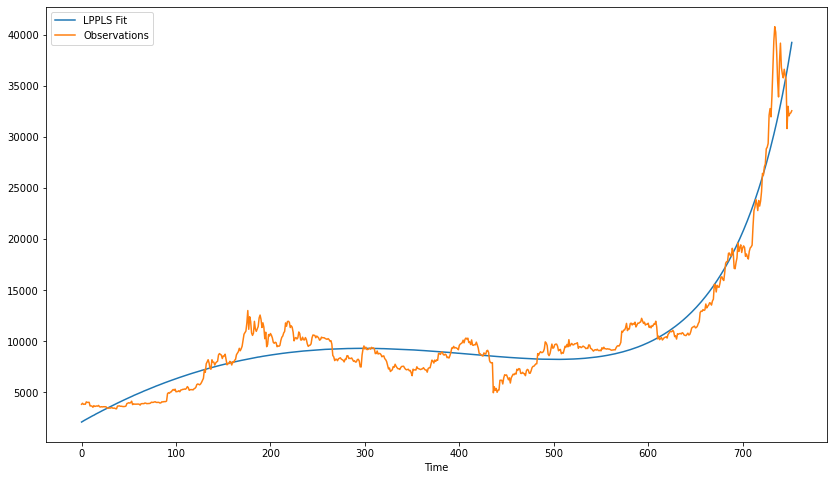

In [4]:
lppls_model.plot_fit()

In [33]:
print("# tc = {}\n# m = {}\n# w = {}\n# a = {}\n# b = {}\n# c1 = {}\n# c2 = {}\n# -------------".format(tc,m,w,a,b,c1,c2))


# tc = 986.6265633552732
# m = -4.980844401120871
# w = 26.2052451458054
# a = 8.87400182013037
# b = 1.7064149950059718e+16
# c1 = -2307489660667730.0
# c2 = -16225403182394.75
# -------------


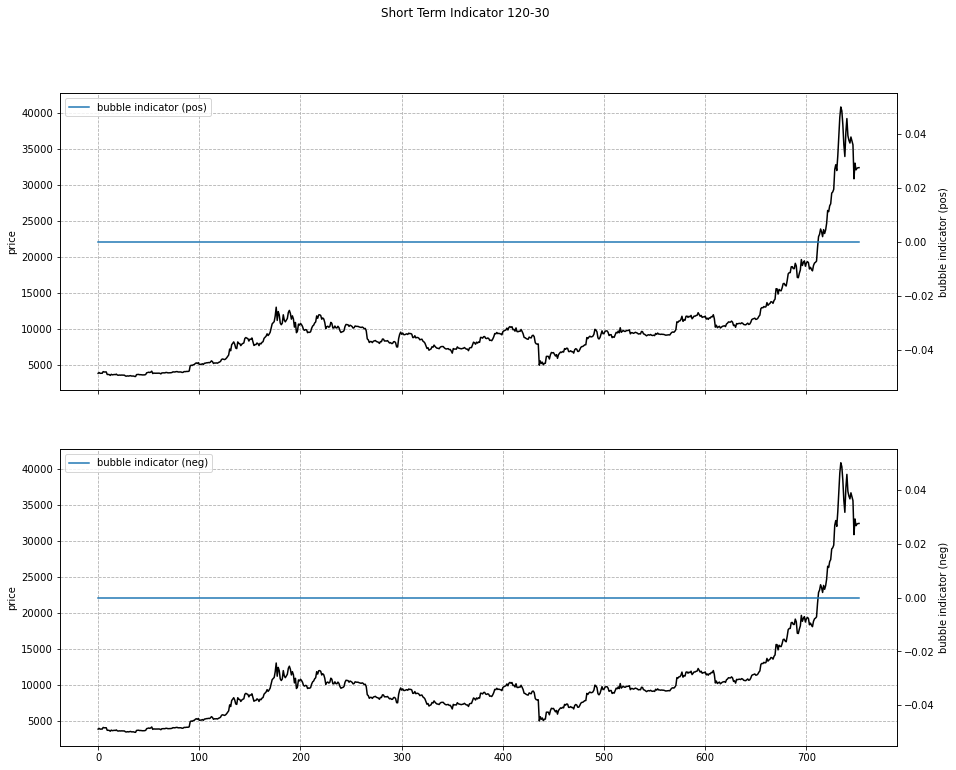

In [26]:
# define custom filter condition
filter_conditions_config = [
  {'condition_1':[
      (tLen*0.8, tLen*1.2), # tc_range
      (0.1, 0.9), # m_range
      (6,13), # w_range
      2.5, # O_min
      0.5, # D_min
  ]},
]

# compute the confidence indicator
res = lppls_model.mp_compute_indicator(
    workers=4, 
    window_size=120, 
    smallest_window_size=30, 
    increment=5, 
    max_searches=25,
    filter_conditions_config=filter_conditions_config
)

lppls_model.plot_confidence_indicators(res, condition_name='condition_1', title='Short Term Indicator 120-30')

# should give a plot like the following...

In [22]:
result_df = pd.DataFrame()
dir(lppls_model)
#result_df = lppls_model.res_to_df(res, condition_name = 'condition_1')

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_func_compute_indicator',
 '_get_tc_bounds',
 'coef_',
 'fit',
 'func_restricted',
 'indicator_result',
 'lppls',
 'matrix_equation',
 'minimize',
 'mp_compute_indicator',
 'observations',
 'plot_confidence_indicators',
 'plot_fit']

In [9]:
tc, m, w, a, b, c1, c2

(2300.889722593678,
 -4.2699994620639785,
 84.68856992391378,
 658.9314119240552,
 8.581701220630565e+17,
 7.007253315761445e+16,
 1.327719018348739e+17)

In [24]:
help(lppls)

Help on module lppls.lppls in lppls:

NAME
    lppls.lppls

CLASSES
    builtins.object
        LPPLS
    
    class LPPLS(builtins.object)
     |  LPPLS(observations)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, observations)
     |      Args:
     |          observations (np.array,pd.DataFrame): 2xM matrix with timestamp and observed value.
     |  
     |  fit(self, observations, max_searches, minimizer='Nelder-Mead')
     |      Args:
     |          observations (Mx2 numpy array): the observed time-series data.
     |          max_searches (int): The maxi amount of searches to perform before giving up. The literature suggests 25.
     |          minimizer (str): See list of valid methods to pass to scipy.optimize.minimize:
     |              https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
     |      Returns:
     |          tc, m, w, a, b, c, c1, c2
     |  
     |  func_restricted(self, x, *args

In [28]:
type(lppls_model)

lppls.lppls.LPPLS

In [29]:
print(lppls_model)